# K-Nearest Neighbor (KNN)
We will be using a dataset sourced from UC Irvine Machine Learning site (https://archive.ics.uci.edu/dataset/212/vertebral+column).  

Data set containing values for six biomechanical features used to classify orthopaedic patients into 3 classes (normal, disk hernia or spondilolysthesis)

The objective of this exercise is to build a KNN model that classifies into the 3 Classes.

In [ ]:
# prompt: Load libraries to build KNN model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# prompt: Load the dataset "column_3C_weka.csv"

# Load the dataset
data = pd.read_csv('column_3C_weka.csv')

In [ ]:
# prompt: Display top 10 rows of the dataset

print(data.head(10))


   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   
5         40.250200    13.921907              25.124950     26.328293   
6         53.432928    15.864336              37.165934     37.568592   
7         45.366754    10.755611              29.038349     34.611142   
8         43.790190    13.533753              42.690814     30.256437   
9         36.686353     5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.5

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
# prompt: check for missing values in the dataset

# Check for missing values
print(data.isnull().sum())

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


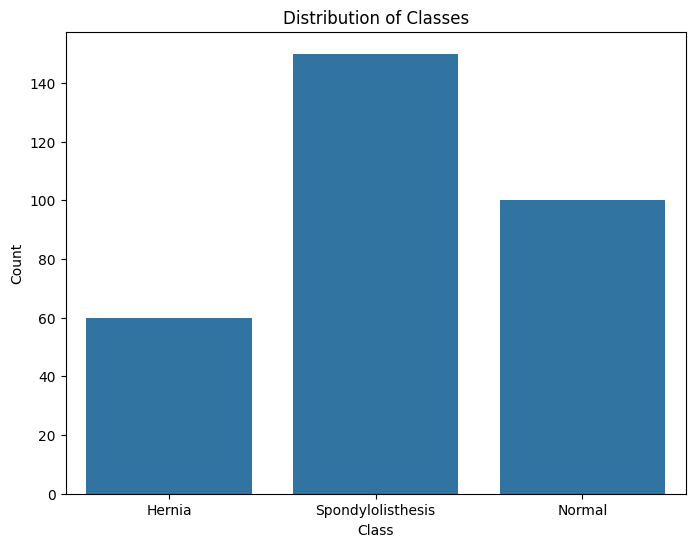

In [ ]:
# prompt: Visualize the distribution of class

# Visualize the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


                          pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282     0.432764   
sacral_slope                      0.814960     0.062345   
pelvic_radius                    -0.247467     0.032668   
degree_spondylolisthesis          0.638743     0.397862   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt                            0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   

                         

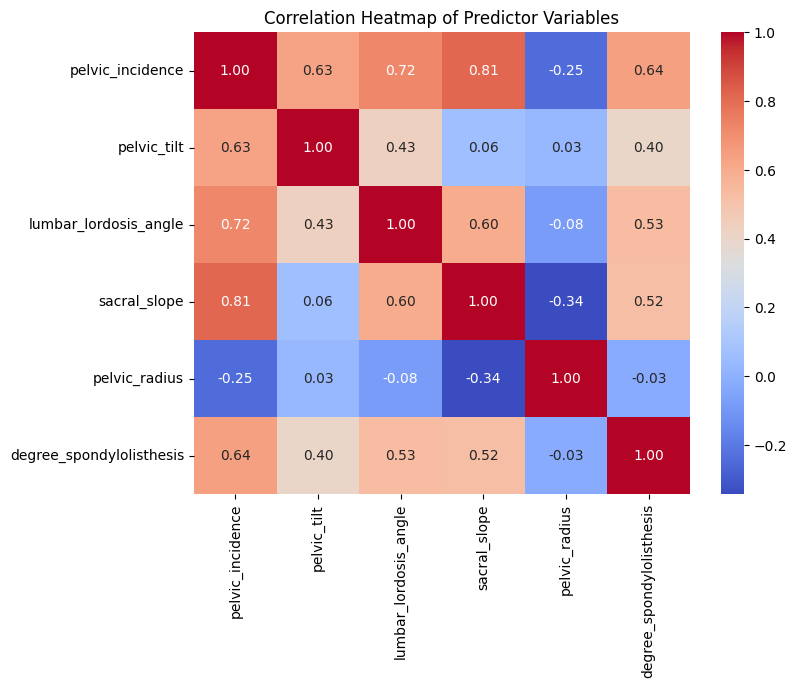

In [ ]:
# Select only numeric features for correlation calculation
import numpy as np

numeric_features = data.select_dtypes(include=np.number).columns

# Calculate and display correlation matrix
correlation_matrix = data[numeric_features].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Predictor Variables')
plt.show()

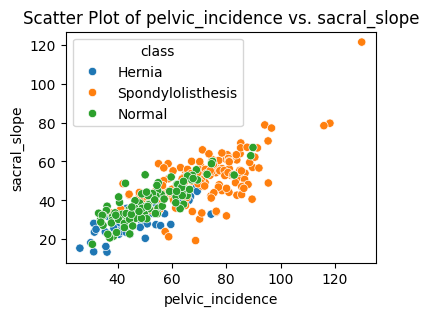

In [ ]:
# prompt: Create scatter plot for class with x = 'pelvic_incidence' and y = 'sacral_slope'

# Create a scatter plot for the 'class' with x = 'pelvic_incidence' and y = 'sacral_slope'
plt.figure(figsize=(4, 3))
sns.scatterplot(x='pelvic_incidence', y='sacral_slope', hue='class', data=data)
plt.title('Scatter Plot of pelvic_incidence vs. sacral_slope')
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

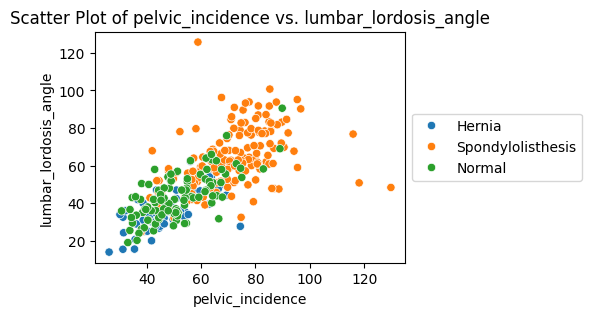

In [ ]:
# prompt: # prompt: Create scatter plot for class with x = 'pelvic_incidence' and y = 'lumbar_lordosis_angle'

# Create a scatter plot for the 'class' with x = 'pelvic_incidence' and y = 'lumbar_lordosis_angle'
plt.figure(figsize=(4, 3))
sns.scatterplot(x='pelvic_incidence', y='lumbar_lordosis_angle', hue='class', data=data)
plt.title('Scatter Plot of pelvic_incidence vs. lumbar_lordosis_angle')
plt.xlabel('pelvic_incidence')
plt.ylabel('lumbar_lordosis_angle')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # Move legend to the right
plt.show()

In [ ]:
# prompt: Convert categorical variables into numeric values

# Convert categorical variable 'class' into numerical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

print(data.head(10))

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   
5         40.250200    13.921907              25.124950     26.328293   
6         53.432928    15.864336              37.165934     37.568592   
7         45.366754    10.755611              29.038349     34.611142   
8         43.790190    13.533753              42.690814     30.256437   
9         36.686353     5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis  class  
0      98.672917                 -0.254400      0  
1     114.405425                  4.564259      0  
2     105.985135                 -3.5303

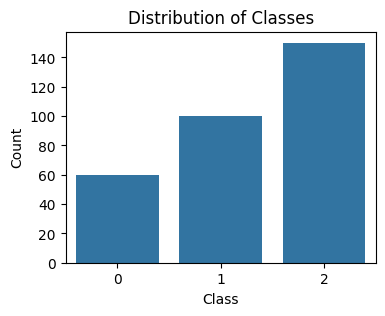

In [ ]:
# prompt: Display distribution of class
# Visualize the distribution of classes
plt.figure(figsize=(4, 3))
sns.countplot(x='class', data=data)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Note: In the above Plot ...  
0 - Hernia  
1 - Normal  
2 - spondylolisthesis  

In [ ]:
# prompt: Normalize all columns except class

# Separate features (X) and target variable (y)
X = data.drop('class', axis=1)
y = data['class']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Concatenate the normalized features with the target variable
data_normalized = pd.concat([X_normalized, y], axis=1)

In [ ]:
# prompt: Split into Train and Test datasets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

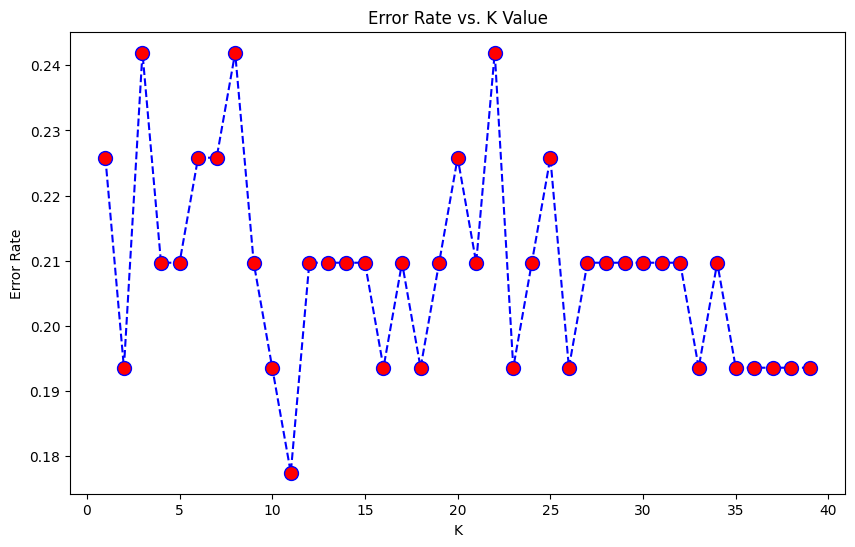

[[ 7  3  2]
 [ 4 13  1]
 [ 1  1 30]]
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.76      0.72      0.74        18
           2       0.91      0.94      0.92        32

    accuracy                           0.81        62
   macro avg       0.75      0.75      0.75        62
weighted avg       0.80      0.81      0.80        62



In [ ]:
# prompt: To perform KNN, check for the best K value

# Finding the best K value
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Use the best k value from the plot above. Example k = 18
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

In [ ]:
# prompt: Display Accuracy and n_neighbors from the above model

# Assuming you have already executed the provided code and the 'knn' object is defined.

print("Accuracy:", knn.score(X_test, y_test))
print("n_neighbors:", knn.n_neighbors)

Accuracy: 0.8064516129032258
n_neighbors: 18


From the above plot, the lowest error is when n-neighbors = 11  

In [ ]:
# prompt: Build a KNN model with n_neighbors = 11

# Use the best k value from the plot above. Example k = 11
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

# Assuming you have already executed the provided code and the 'knn' object is defined.

print("Accuracy:", knn.score(X_test, y_test))
print("n_neighbors:", knn.n_neighbors)

[[ 9  2  1]
 [ 5 12  1]
 [ 1  1 30]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.80      0.67      0.73        18
           2       0.94      0.94      0.94        32

    accuracy                           0.82        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.83      0.82      0.82        62

Accuracy: 0.8225806451612904
n_neighbors: 11


In [ ]:
# prompt: Display Actual and Predicted Values for class for first 20 records

# Assuming 'pred' contains the predicted values and 'y_test' contains the actual values.
# Also assuming 'y_test' is a pandas Series or a numpy array.

# Create a DataFrame with actual and predicted values for the first 20 records
comparison_df = pd.DataFrame({'Actual': y_test.head(20), 'Predicted': pred[:20]})

# Display the DataFrame
print(comparison_df)

     Actual  Predicted
289       1          1
9         0          2
57        0          0
60        2          2
25        0          0
63        2          2
92        2          2
184       2          2
244       1          0
46        0          0
75        2          2
163       2          2
296       1          1
307       1          0
285       1          1
290       1          0
5         0          1
155       2          2
164       2          1
168       2          2


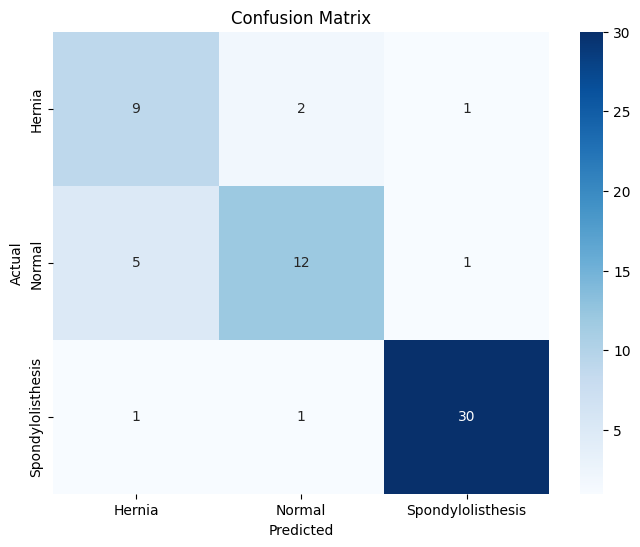

In [ ]:
# prompt: Create a Confusion Matrix for Actual versus Predicted class

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'pred' contains the predicted values and 'y_test' contains the actual values.
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()